In [1]:
try:
    # Installing the latex2sympy package from a Wheel file
    !pip install /kaggle/input/latex2sympy-1-0-3/latex2sympy-1.0.3-py3-none-any.whl
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


Processing /kaggle/input/latex2sympy-1-0-3/latex2sympy-1.0.3-py3-none-any.whl


In [2]:
try:
    # Import the latex2sympy module and display its available methods and attributes
    import latex2sympy
    print(dir(latex2sympy))
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


['ConfigL2S', 'CoordSys3D', 'O', 'ParsingError', 'Sys', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'color', 'comparators', 'createSymbol', 'findEndOfAdd', 'findEndOfIndexOrOperand', 'findEndOfRoundBrace', 'findEndOfValue', 'functions', 'jumpToNormal', 'latex2sympy', 'printPos', 'removeComments', 'strToSympy', 'symbols', 'sympy']


In [3]:
try:
    # Basic system imports and environment variable manipulation
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
    
    # Core and utility libraries
    import re
    import time
    import tarfile
    import warnings
    import pickle
    import glob
    import aimo
    import signal
    import sys  
    import random
    import traceback
    import logging
    from collections import Counter
    from datetime import datetime
    import math
    
    # Data handling and processing libraries
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from scipy import stats
    from sklearn.model_selection import train_test_split, KFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
    
    # Visualization library
    import matplotlib.pyplot as plt
    
    # Symbolic mathematics library
    from sympy import (Symbol, Integer, simplify, expand, factor, diff, integrate, Eq, Integral,
                      Set, floor, ceiling, frac, binomial, Function, symbols)
    from sympy.core.sympify import SympifyError
    from sympy import sympify, SympifyError
    
    # Deep learning libraries
    import tensorflow as tf
    from tensorflow.keras.models import Sequential, load_model, Model
    from tensorflow.keras.models import model_from_json
    from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Input, GlobalAveragePooling1D
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
    from tensorflow.keras.regularizers import l1_l2
    from tensorflow.keras.optimizers import Adam
    
    # Keras NLP for language models and tokenization
    import keras
    import keras_nlp
    from keras_nlp.models import GemmaTokenizer, GemmaCausalLM
    
    # Package metadata access
    from importlib.metadata import distributions
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


2024-06-07 16:15:52.076960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-07 16:15:52.077072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-07 16:15:52.205363: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
try:
    print(tf.__version__)
    print(keras_nlp.__version__)
    print(keras.__version__)
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


2.15.0
0.12.1
3.3.3


In [5]:
try:
    def list_installed_packages():
        packages = []
        for dist in distributions():
            packages.append(f"{dist.metadata['Name']}=={dist.version}")
        return sorted(packages)
    
    # Get the list of installed packages
    packages_list = list_installed_packages()
    
    # Desired number of columns
    num_cols = 4
    
    # Split the list of packages into sublists
    sublists = [packages_list[i::num_cols] for i in range(num_cols)]
    
    # Pad sublists to ensure they all have the same length
    max_length = max(len(sublist) for sublist in sublists)
    for sublist in sublists:
        sublist.extend([''] * (max_length - len(sublist)))
    
    # Create a DataFrame
    df = pd.DataFrame({f'Column {i+1}': sublist for i, sublist in enumerate(sublists)})
    
    # Display the DataFrame
    print(df.to_string(index=False))
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


                                        Column 1                                       Column 2                                       Column 3                              Column 4
                                   Babel==2.14.0                                    Boruta==0.3                                  Brotli==1.1.0                       CVXcanon==0.1.2
                                 Cartopy==0.23.0                                  Cython==3.0.8                             Deprecated==1.2.14           Farama-Notifications==0.0.4
                                    Flask==3.0.3                                   Geohash==1.0                              GitPython==3.1.41                      ImageHash==4.3.1
                                   Janome==0.5.0                                  Jinja2==3.1.2                           LunarCalendar==0.0.9                           Mako==1.3.5
                                 Markdown==3.5.2                              MarkupSafe==2.1.3

Analyzing mathematical problems in train.csv...
Statistics of Mathematical Problems:
Average Problem Length: 222.10


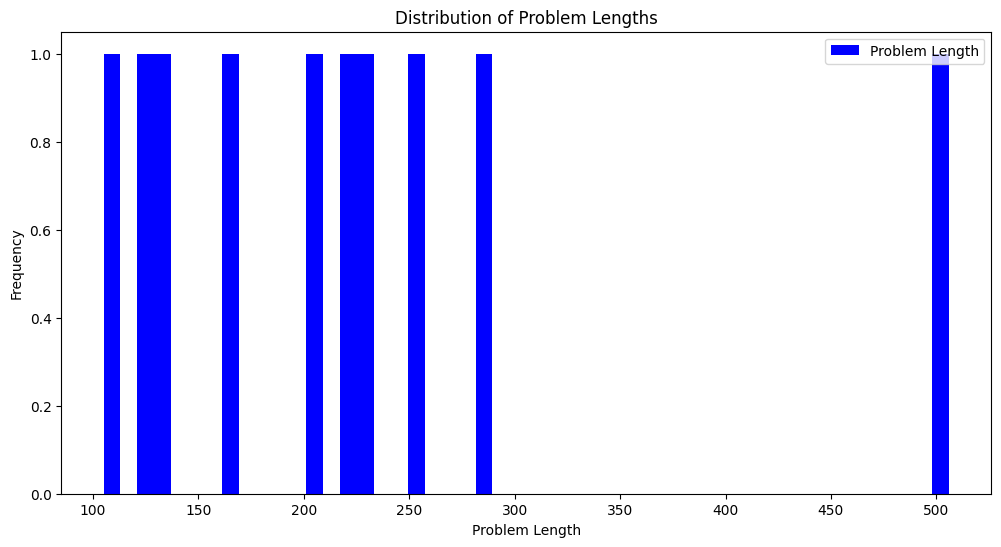

Minimum Answer: 52
Maximum Answer: 800


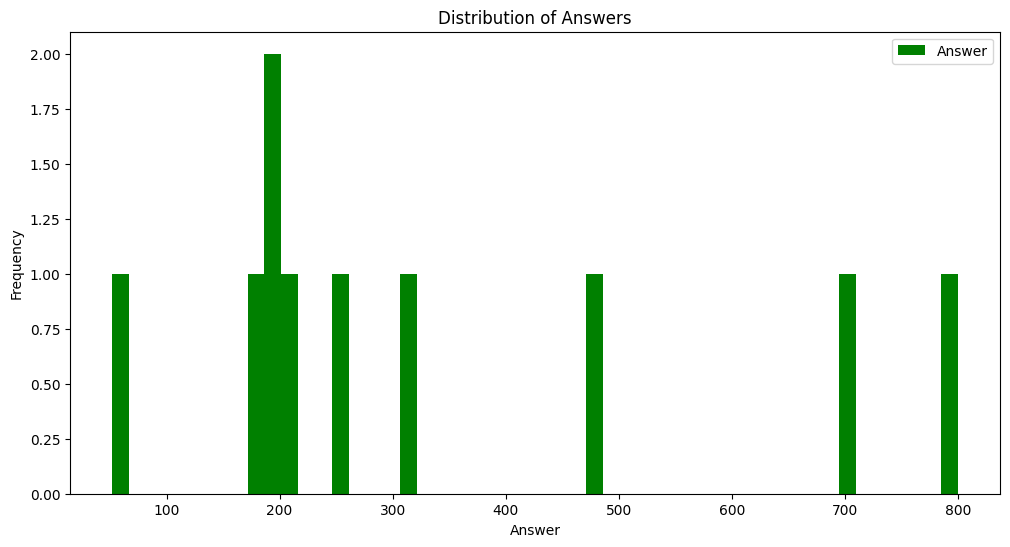

Analyzing mathematical problems in test.csv...
Statistics of Mathematical Problems:
Average Problem Length: 18.67


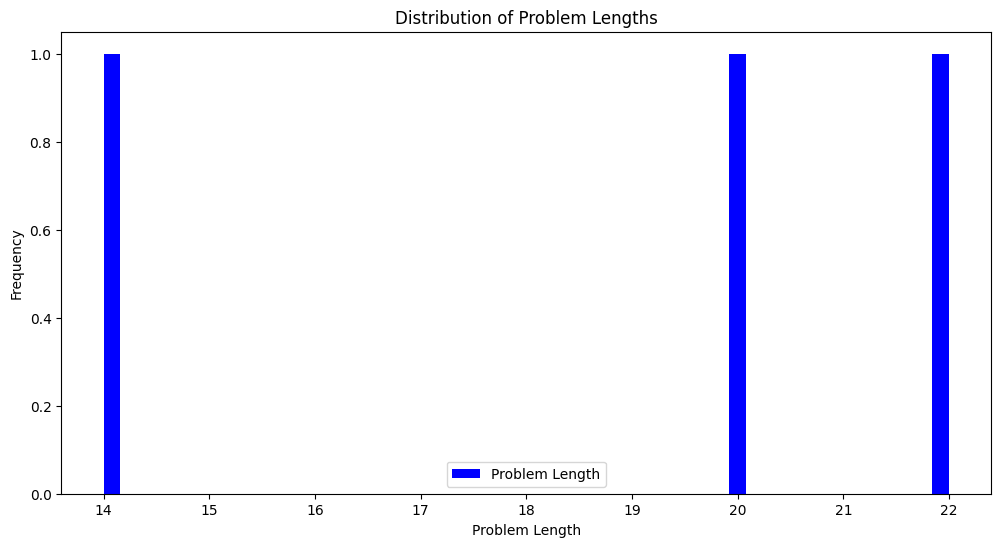

Execution Time: 1.24021315574646 seconds


In [6]:
try:
    # Ignore FutureWarning messages
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    # Specific directory for the AIME Math Problems competition
    DATA_DIR = os.getenv('DATA_DIR', '/kaggle/input/ai-mathematical-olympiad-prize/')
    
    # Specific files for the competition
    aime_files = ["train.csv", "test.csv"]
    
    # Function to load and optimize CSV data
    def optimize_csv(file_path):
        """
        Loads CSV data and optimizes it for memory usage.
        """
        df = pd.read_csv(file_path)
        
        # Optimize DataFrame
        for col in df.columns:
            col_type = df[col].dtype
            if col_type == 'object':
                df[col] = df[col].astype('category')
        
        return df
    
    # Function to load data for the AIME Math Problems competition
    def load_aime_data():
        """
        Loads the data files for the AIME Math Problems competition.
        """
        data = {file: optimize_csv(os.path.join(DATA_DIR, file)) for file in aime_files}
        return data
    
    # Function to analyze mathematical problems
    def analyze_problems(df):
        """
        Analyzes and prints statistics on mathematical problems.
        """
        problem_lengths = df['problem'].str.len()
        
        # Calculate and print statistics
        print("Statistics of Mathematical Problems:")
        print(f"Average Problem Length: {problem_lengths.mean():.2f}")
        
        # Plot the distribution of problem lengths using Matplotlib
        plt.figure(figsize=(12, 6))
        plt.hist(problem_lengths, bins=50, color='blue', label='Problem Length')
        plt.xlabel('Problem Length')
        plt.ylabel('Frequency')
        plt.title('Distribution of Problem Lengths')
        plt.legend()
        plt.show()
        
        if 'answer' in df.columns:
            answers = df['answer']
            print(f"Minimum Answer: {answers.min()}")
            print(f"Maximum Answer: {answers.max()}")
            
            # Plot the distribution of answers using Matplotlib
            plt.figure(figsize=(12, 6))
            plt.hist(answers, bins=50, color='green', label='Answer')
            plt.xlabel('Answer')
            plt.ylabel('Frequency')
            plt.title('Distribution of Answers')
            plt.legend()
            plt.show()
    
    # Main function
    def main():
        start_time = time.time()
        
        # Load data from the AIME Math Problems competition
        aime_data = load_aime_data()
        
        # Analyze mathematical problems
        for file_name, df in aime_data.items():
            print(f"Analyzing mathematical problems in {file_name}...")
            analyze_problems(df)
        
        end_time = time.time()
        print(f"Execution Time: {end_time - start_time} seconds")
        
        return aime_data
    
    if __name__ == '__main__':
        aime_data = main()
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


In [7]:
try:
    # Path to the directories of the files
    data_dir = '/kaggle/input/ai-mathematical-olympiad-prize'
    
    # Load training data
    train_data = pd.read_csv(f"{data_dir}/train.csv")
    print("Training Data:")
    print(train_data.head())  # Display the first few rows of the example submission
    print(train_data.info())  # Information about the columns and data types
    
    # Load test data
    test_data = pd.read_csv(f"{data_dir}/test.csv")
    print("\nTest Data:")
    print(test_data.head())  
    print(test_data.info())  
    
    # Load example submission
    sample_submission = pd.read_csv(f"{data_dir}/sample_submission.csv")
    print("\nExample Submission:")
    print(sample_submission.head())  
    print(sample_submission.info())  
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


Training Data:
       id                                            problem  answer
0  229ee8  Let $k, l > 0$ be parameters. The parabola $y ...      52
1  246d26  Each of the three-digits numbers $111$ to $999...     250
2  2fc4ad  Let the `sparkle' operation on positive intege...     702
3  430b63  What is the minimum value of $5x^2+5y^2-8xy$ w...     800
4  5277ed  There exists a unique increasing geometric seq...     211
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       10 non-null     object
 1   problem  10 non-null     object
 2   answer   10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes
None

Test Data:
   row_id      id                 problem
0       0  000aaa          What is $1-1$?
1       1  111bbb    What is $0\times10$?
2       2  222ccc  Solve $4+x=4$ for $x$.
<class 'pandas.core.frame.DataFrame'>
RangeIn

x**2 + 3*x + 1
Original LaTeX expression: \vert \vert x-1 \vert -2 \vert=\frac{m}{100}
Preprocessed LaTeX expression: abs( ) x-1 abs( -2 )=frac{m}{100}
The equation Eq(x*((s*((1*a)*b))*1) + (((1*2)*(-1))*(s*(b*((1*1)*a))))*(-1), (m*(c*(a*((1*f)*r))))*100) contains variables. Cannot calculate a modular answer.
Problem 739bc9 successfully processed.
SymPy expression: Eq(x*((s*((1*a)*b))*1) + (((1*2)*(-1))*(s*(b*((1*1)*a))))*(-1), (m*(c*(a*((1*f)*r))))*100)
Modular answer: None
Type: Equation
Variables: {a, x, f, r, b, c, s, m}
Constants: {1, 2, 100, -1}
Simplified: Eq(a*b*s*(x + 2), 100*a*c*f*m*r)
Expanded: Eq(a*b*s*x + 2*a*b*s, 100*a*c*f*m*r)
Factored: Eq(a*b*s*(x + 2), 100*a*c*f*m*r)
Differentiated: Derivative(Eq(x*((s*((1*a)*b))*1) + (((1*2)*(-1))*(s*(b*((1*1)*a))))*(-1), (m*(c*(a*((1*f)*r))))*100), a)
Integrated: N/A - Integration not applicable for inequalities

Problems successfully processed: 1


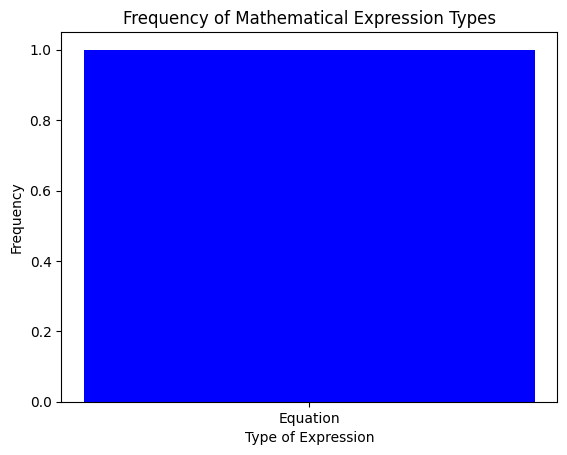

In [8]:
try:
    import latex2sympy
    from sympy import simplify, sympify, SympifyError
    
    # Default configuration for latex2sympy
    config = latex2sympy.ConfigL2S()
    
    latex_string = "x^2 + 3x + 1"
    expression = latex2sympy.latex2sympy(latex_string, config)
    simplified_expression = simplify(expression)
    print(simplified_expression)
    
    N = symbols('N', integer=True)
    def mapping_function(x):
        return Function('f')(x)
    
    def extract_latex_expressions(text):
        # Patterns to capture LaTeX expressions
        patterns = [
            r'\$\$(.*?)\$\$',  # Capture expressions delimited by $$
            r'\\[(](.*?)[\\)]',  # Capture expressions delimited by \( \)
            r'\\[[[](.*?)[\\]]'  # Capture expressions delimited by \[ \]
        ]
        expressions = []
        for pattern in patterns:
            # Use re.DOTALL so that the dot (.) matches any character including a newline
            matches = re.finditer(pattern, text, re.DOTALL)
            for match in matches:
                expressions.append(match.group(1).strip())
        return expressions
    
    def is_math_expression(expr):
        # Extend characters to include subscript, superscript, and common mathematical functions
        math_chars = {
            "0123456789+-=*/()[]{}^_\\",  # Basic characters and operators
            "frac", "sqrt", "sin", "cos", "tan", "int", "sum",  # Common functions
            "leq", "geq", "neq", "approx",  # Relations
            "alpha", "beta", "gamma", "delta",  # Common Greek variables
            "infty",  # Special symbols
            "dots"  # etc.
        }
        math_chars = set(''.join(math_chars))  # Transform into a set of unique characters
    
        # Check for the presence of mathematical characters
        contains_math = any(char in math_chars for char in expr)
    
        # Check if it is not just alphabetic text (ignoring spaces)
        not_only_alpha = not all(char.isalpha() for char in expr.replace(' ', ''))
    
        return contains_math and not_only_alpha
    
    def preprocess_latex(latex_str):
        # Substitutions to adjust the structure and remove unnecessary LaTeX commands
        substitutions = [
            (r'\s+', ' '),  # Reduce all whitespace to single spaces
            (r'\\left', ''), (r'\\right', ''),  # Remove redundant delimiters
            (r'\\frac', 'frac'), (r'\\cdot', '*'),  # Adjust common functions and symbols
            (r'\\leq', '<='), (r'\\geq', '>='),  # Convert LaTeX relational operators to sympy format
            (r'\\lfloor', 'floor('), (r'\\rfloor', ')'),  # Convert floor function
            (r'\\lceil', 'ceiling('), (r'\\rceil', ')'),  # Convert ceiling function
            (r'\\mid', '|'), (r'\\vert', '|'),  # Convert set and absolute value notations
            (r'\\left\(', '('), (r'\\right\)', ')'),  # Normalize brackets
            (r'\\left\[', '['), (r'\\right\]', ']'),  # Normalize square brackets
            (r'(\d+)!', r'factorial(\1)'),  # Convert factorial notation
            (r'\|(.+?)\|', r'abs(\1)')  # Convert absolute value notation
        ]
        for pattern, replacement in substitutions:
            latex_str = re.sub(pattern, replacement, latex_str)
        return latex_str
    
    def latex_to_sympy(latex_str):
        preprocessed_latex = preprocess_latex(latex_str)
        try:
            sympy_expr = latex2sympy.latex2sympy(preprocessed_latex, config)
            if isinstance(sympy_expr, list):
                return sympy_expr[0]
            return sympy_expr
        except (latex2sympy.LaTeXParsingError, TypeError, ValueError) as e:
            print(f"Error converting LaTeX expression: {e}")
            return None
    
    def extract_information(sympy_expr):
        if sympy_expr is None or isinstance(sympy_expr, Symbol):
            return None, None
        
        variables = sympy_expr.free_symbols
        constants = sympy_expr.atoms(Integer)
        
        return variables, constants
    
    def get_expression_type(sympy_expr):
        if sympy_expr is None:
            return "Undefined"
        
        if isinstance(sympy_expr, Symbol):
            return "Variable"
        
        if hasattr(sympy_expr, 'is_Equality') and sympy_expr.is_Equality:
            return "Equation"
        elif hasattr(sympy_expr, 'is_Relational') and sympy_expr.is_Relational:
            return "Inequality"
        elif hasattr(sympy_expr, 'is_Function') and sympy_expr.is_Function:
            return "Function"
        else:
            return "Expression"
    
    def manipulate_expression(sympy_expr):
        if sympy_expr is None or isinstance(sympy_expr, Symbol):
            return None, None, None, "N/A - No free variables", "N/A - No free variables"
        
        simplified = simplify(sympy_expr)
        expanded = expand(sympy_expr)
        factored = factor(sympy_expr)
        
        if sympy_expr.free_symbols:
            variables = list(sympy_expr.free_symbols)
            try:
                differentiated = diff(sympy_expr, variables[0])
            except Exception as e:
                differentiated = str(e)
            
            # Check if the expression is an inequality before attempting to integrate
            if sympy_expr.is_Relational:
                integrated = "N/A - Integration not applicable for inequalities"
            else:
                try:
                    integrated = integrate(sympy_expr, variables[0])
                except Exception as e:
                    integrated = str(e)
        else:
            differentiated = "N/A - No free variables"
            integrated = "N/A - No free variables"
        
        return simplified, expanded, factored, differentiated, integrated
    
    def calculate_modular_answer(sympy_expr):
        try:
            if isinstance(sympy_expr, Eq):
                # If the expression is an equation, evaluate only the left side
                if sympy_expr.lhs.free_symbols:
                    print(f"The equation {sympy_expr} contains variables. Cannot calculate a modular answer.")
                    return None
                numerical_value = sympify(sympy_expr.lhs).evalf()
            elif sympy_expr.is_Relational:
                # If the expression is an inequality, we cannot calculate a modular answer
                print(f"The inequality {sympy_expr} does not permit the calculation of a modular answer.")
                return None
            elif sympy_expr.free_symbols:
                # If the expression contains symbols (variables), we cannot calculate a modular answer
                print(f"The expression {sympy_expr} contains variables. Cannot calculate a modular answer.")
                return None
            else:
                numerical_value = sympify(sympy_expr).evalf()
    
            modular_answer = int(numerical_value) % 1000
            return modular_answer
        except (SympifyError, ValueError) as e:
            print(f"Error calculating the modular answer for the expression {sympy_expr}: {e}")
            return None
    
    # Training data directory
    train_data_dir = '/kaggle/input/ai-mathematical-olympiad-prize'
    train_data_file = 'train.csv'
    
    # Load the training data
    train_data = pd.read_csv(os.path.join(train_data_dir, train_data_file))
    
    # Counter to track how many problems were successfully processed
    problems_processed = 0
    
    # List to store the SymPy expressions for each problem
    sympy_expressions = []
    
    def plot_expression_types(expression_types):
        # Count the frequency of each expression type
        type_counts = {typ: expression_types.count(typ) for typ in set(expression_types)}
    
        # Create a bar chart with the counts of each expression type
        plt.bar(type_counts.keys(), type_counts.values(), color='blue')
        plt.xlabel('Type of Expression')  # Label for the x-axis
        plt.ylabel('Frequency')  # Label for the y-axis
        plt.title('Frequency of Mathematical Expression Types')  # Title of the chart
        plt.show()  # Display the plot
        
    # Process each problem
    try:
        for _, row in train_data.iterrows():
            problem_id = row['id']
            problem_text = row['problem']
    
            latex_expressions = extract_latex_expressions(problem_text)
    
            for expr in latex_expressions:
                if is_math_expression(expr):
                    try:
                        preprocessed_expr = preprocess_latex(expr)
                        print(f"Original LaTeX expression: {expr}")
                        print(f"Preprocessed LaTeX expression: {preprocessed_expr}")
    
                        sympy_expr = latex_to_sympy(preprocessed_expr)
                        if sympy_expr is not None:
                            sympy_expressions.append(sympy_expr)  # Add the SymPy expression to the list
                            modular_answer = calculate_modular_answer(sympy_expr)
                            problems_processed += 1
                            print(f"Problem {problem_id} successfully processed.")
                            print(f"SymPy expression: {sympy_expr}")
                            print(f"Modular answer: {modular_answer}")
    
                            variables, constants = extract_information(sympy_expr)
                            expr_type = get_expression_type(sympy_expr)
                            simplified, expanded, factored, differentiated, integrated = manipulate_expression(sympy_expr)
    
                            print(f"Type: {expr_type}")
                            print(f"Variables: {variables}")
                            print(f"Constants: {constants}")
                            print(f"Simplified: {simplified}")
                            print(f"Expanded: {expanded}")
                            print(f"Factored: {factored}")
                            print(f"Differentiated: {differentiated}")
                            print(f"Integrated: {integrated}")
                            print()
                    except Exception as e:
                        print(f"Error processing problem {problem_id}: {str(e)}")
                else:
                    print(f"Expression '{expr}' from problem {problem_id} is not a valid mathematical expression.")
    
    except Exception as e:
        print(f"An error occurred during processing: {str(e)}")
    
    print(f"Problems successfully processed: {problems_processed}")
    
    # Generate a list of expression types for all valid expressions
    expression_types = [get_expression_type(expr) for expr in sympy_expressions if expr is not None]
    plot_expression_types(expression_types)  # Call the function to plot the expression types
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


In [9]:
try:
    # Default configuration for latex2sympy
    config = latex2sympy.ConfigL2S()
    
    def preprocess_latex(latex_str):
        substitutions = [
            (r'\s+', ' '),  # Reduce all whitespace to single spaces
            (r'\\left', ''), (r'\\right', ''),  # Remove redundant delimiters
            (r'\\frac{(.+?)}{(.+?)}', r'((\1)/(\2))'),  # Adjust fraction notation
            (r'\\cdot', '*'),  # Replace multiplication symbol
            (r'\\leq', '<='), (r'\\geq', '>='),  # Convert LaTeX relational operators
            (r'\\lfloor', 'floor('), (r'\\rfloor', ')'),  # Convert floor function
            (r'\\lceil', 'ceiling('), (r'\\rceil', ')'),  # Convert ceiling function
            (r'\\mid', '|'),  # Convert set notation
            (r'\\left\(', '('), (r'\\right\)', ')'),  # Normalize brackets
            (r'\\left\[', '['), (r'\\right\]', ']'),  # Normalize square brackets
            (r'(\d+)!', r'factorial(\1)'),  # Convert factorial notation
            (r'\\sin', 'sin'), (r'\\cos', 'cos'), (r'\\tan', 'tan'),  # Convert trig functions
            (r'\\exp', 'exp'), (r'\\log', 'log'),  # Convert exp and log functions
            (r'\\sqrt{(.+?)}', r'sqrt(\1)'),  # Convert square root notation
            (r'\\sum_{(.+?)}^{(.+?)}', r'sum(\1, \2)'),  # Convert summation notation
            (r'\\int_{(.+?)}^{(.+?)}', r'integrate(\1, \2)'),  # Convert integral notation
            (r'\\infty', 'oo'),  # Convert infinity symbol
            (r'\\pi', 'pi'),  # Convert pi symbol
            (r'\\theta', 'theta'),  # Convert theta symbol
            (r'\\\\', r'\\'),  # Handle double backslashes
            (r'\s*{\s*', '('), (r'\s*}\s*', ')'),  # Replace curly braces with parentheses
            (r'\s*\(\s*', '('), (r'\s*\)\s*', ')'),  # Remove extra spaces around parentheses
            (r'\s*\|\s*', '|'),  # Remove extra spaces around pipe symbols
            (r'\s*-\s*', '-'),  # Remove extra spaces around minus sign
            (r'\s*\+\s*', '+'),  # Remove extra spaces around plus sign
            (r'\s*\*\s*', '*'),  # Remove extra spaces around multiplication sign
            (r'\s*/\s*', '/'),  # Remove extra spaces around division sign
            (r'\s*=\s*', '='),  # Remove extra spaces around equals sign
        ]
    
        for pattern, replacement in substitutions:
            latex_str = re.sub(pattern, replacement, latex_str)
    
        # Process absolute value expressions
        latex_str = process_absolute_value(latex_str)
        
        return latex_str
    
    def process_absolute_value(latex_str):
        parts = re.split(r'(\\vert)', latex_str)
        processed_parts = []
        inside_abs = False
        
        for part in parts:
            if part == r'\vert':
                if inside_abs:
                    processed_parts.append(')')
                    inside_abs = False
                else:
                    processed_parts.append('abs(')
                    inside_abs = True
            else:
                processed_parts.append(part)
        
        if inside_abs:
            processed_parts.append(')')  # Close any open abs(
        
        return ''.join(processed_parts)
    
    def convert_latex_to_sympy(latex_str):
        preprocessed_latex = preprocess_latex(latex_str)
        try:
            sympy_expr = sympify(preprocessed_latex)
            return sympy_expr
        except (SympifyError, TypeError, ValueError) as e:
            print(f"Error converting LaTeX expression: {e}")
            return None
    
    def extract_latex_expressions(text):
        patterns = [
            r'\$\$(.*?)\$\$',  # Capture expressions delimited by $$
            r'\\[(](.*?)[\\)]',  # Capture expressions delimited by \( \)
            r'\\[[[](.*?)[\\]]'  # Capture expressions delimited by \[ \]
        ]
        expressions = []
        for pattern in patterns:
            matches = re.finditer(pattern, text, re.DOTALL)
            for match in matches:
                expressions.append(match.group(1).strip())
        return expressions
    
    def is_math_expression(expr):
        math_chars = set('0123456789+-=*/()[]{}^_\\fracsqrtintsumsinccostanlogexp')
        contains_math = any(char in math_chars for char in expr)
        not_only_alpha = not all(char.isalpha() for char in expr.replace(' ', ''))
        return contains_math and not_only_alpha
    
    def process_latex_expressions(text):
        latex_expressions = extract_latex_expressions(text)
        processed_expressions = []
        
        for expr in latex_expressions:
            if is_math_expression(expr):
                sympy_expr = convert_latex_to_sympy(expr)
                if sympy_expr is not None:
                    processed_expressions.append(sympy_expr)
        
        return processed_expressions
    
    # Example Usage
    latex_str = r"\left( \frac{a}{b} \right) \cdot \sin(x) + \sqrt{y} - 2"
    processed_latex = preprocess_latex(latex_str)
    sympy_expr = convert_latex_to_sympy(processed_latex)
    print(f"SymPy Expression: {sympy_expr}")
    
    text = r"This is an example with LaTeX expressions like \(\frac{a}{b}\) and \(\sin(x)\)."
    expressions = process_latex_expressions(text)
    for expr in expressions:
        print(f"Processed Expression: {expr}")
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


SymPy Expression: a*sin(x)/b + sqrt(y) - 2


In [10]:
try:
    def preprocess_latex(latex_str):
        # Substituições básicas de LaTeX para uma forma mais amigável ao SymPy
        substitutions = [
            (r'\s+', ' '),  # Reduz todo o espaço em branco para espaços únicos
            (r'\\left', ''), (r'\\right', ''),  # Remove delimitadores redundantes
            (r'\\frac{(.+?)}{(.+?)}', r'(\1)/(\2)'),  # Ajusta a notação de fração
            (r'\\cdot', '*'),  # Substitui o símbolo de multiplicação
            (r'\\leq', '<='), (r'\\geq', '>='),  # Converte operadores relacionais LaTeX
            (r'\\lfloor', 'floor('), (r'\\rfloor', ')'),  # Converte função floor
            (r'\\lceil', 'ceiling('), (r'\\rceil', ')'),  # Converte função ceiling
            (r'\\mid', '|'),  # Converte notação de conjunto
            (r'\\left\(', '('), (r'\\right\)', ')'),  # Normaliza parênteses
            (r'\\left\[', '['), (r'\\right\]', ']'),  # Normaliza colchetes
            (r'(\d+)!', r'factorial(\1)'),  # Converte notação de fatorial
            (r'\\sin', 'sin'), (r'\\cos', 'cos'), (r'\\tan', 'tan'),  # Converte funções trigonométricas
            (r'\\exp', 'exp'), (r'\\log', 'log'),  # Converte funções exp e log
            (r'\\sqrt{(.+?)}', r'sqrt(\1)'),  # Converte notação de raiz quadrada
            (r'\\sum_{(.+?)}^{(.+?)}', r'sum(\1, \2)'),  # Converte notação de somatório
            (r'\\int_{(.+?)}^{(.+?)}', r'integrate(\1, \2)'),  # Converte notação de integral
            (r'\\infty', 'oo'),  # Converte símbolo de infinito
            (r'\\pi', 'pi'),  # Converte símbolo de pi
            (r'\\theta', 'theta'),  # Converte símbolo de theta
            (r'\\\\', r'\\'),  # Lida com barras invertidas duplas
            (r'\s*{\s*', '('), (r'\s*}\s*', ')'),  # Substitui chaves por parênteses
            (r'\s*\(\s*', '('), (r'\s*\)\s*', ')'),  # Remove espaços extras ao redor dos parênteses
            (r'\s*\|\s*', '|'),  # Remove espaços extras ao redor dos símbolos de pipe
            (r'\s*-\s*', '-'),  # Remove espaços extras ao redor do sinal de menos
            (r'\s*\+\s*', '+'),  # Remove espaços extras ao redor do sinal de mais
            (r'\s*\*\s*', '*'),  # Remove espaços extras ao redor do sinal de multiplicação
            (r'\s*/\s*', '/'),  # Remove espaços extras ao redor do sinal de divisão
            (r'\s*=\s*', '='),  # Remove espaços extras ao redor do sinal de igual
        ]
        
        print(f"Original LaTeX expression: {latex_str}")
    
        for pattern, replacement in substitutions:
            latex_str = re.sub(pattern, replacement, latex_str)
            print(f"After substitution '{pattern}' -> '{replacement}': {latex_str}")
    
        # Processa expressões de valor absoluto
        latex_str = process_absolute_value(latex_str)
        
        return latex_str
    
    def process_absolute_value(latex_str):
        def abs_replacer(match):
            content = match.group(1)
            return f'Abs({content})'
    
        print(f"Processing absolute value in: {latex_str}")
        latex_str = re.sub(r'\\vert\s*(.*?)\s*\\vert', abs_replacer, latex_str)
        print(f"After processing '\\vert': {latex_str}")
        latex_str = re.sub(r'\|\s*(.*?)\s*\|', abs_replacer, latex_str)
        print(f"After processing '|': {latex_str}")
        return latex_str
    
    def convert_latex_to_sympy(latex_str):
        preprocessed_latex = preprocess_latex(latex_str)
        print(f"Preprocessed LaTeX expression: {preprocessed_latex}")
        try:
            sympy_expr = sympify(preprocessed_latex, evaluate=False)
            print(f"SymPy expression: {sympy_expr}")
            return sympy_expr
        except (SympifyError, TypeError, ValueError) as e:
            # Tentar avaliar a expressão se ela contiver operações aritméticas básicas
            if isinstance(e, SympifyError) and any(op in preprocessed_latex for op in ['+', '-', '*', '/']):
                try:
                    sympy_expr = sympify(preprocessed_latex)
                    print(f"SymPy expression (evaluated): {sympy_expr}")
                    return sympy_expr
                except Exception as f:
                    print(f"Error converting LaTeX expression: {f}")
                    return None
            else:
                print(f"Error converting LaTeX expression: {e}")
                return None
    
    def extract_latex_expressions(text):
        patterns = [
            r'\$\$(.*?)\$\$',  # Captura expressões delimitadas por $$
            r'\\[(](.*?)[\\)]',  # Captura expressões delimitadas por \( \)
            r'\\[[[](.*?)[\\]]'  # Captura expressões delimitadas por \[ \]
        ]
        expressions = []
        for pattern in patterns:
            matches = re.finditer(pattern, text, re.DOTALL)
            for match in matches:
                expressions.append(match.group(1).strip())
        return expressions
    
    def is_math_expression(expr):
        math_chars = set('0123456789+-=*/()[]{}^_\\fracsqrtintsumsinccostanlogexp')
        contains_math = any(char in math_chars for char in expr)
        not_only_alpha = not all(char.isalpha() for char in expr.replace(' ', ''))
        return contains_math and not_only_alpha
    
    def process_latex_expressions(text):
        latex_expressions = extract_latex_expressions(text)
        processed_expressions = []
        
        for expr in latex_expressions:
            if is_math_expression(expr):
                sympy_expr = convert_latex_to_sympy(expr)
                if sympy_expr is not None:
                    processed_expressions.append(sympy_expr)
        
        return processed_expressions
    
    # Exemplo de uso com valor absoluto
    latex_str = r"\left| \frac{a}{b} \right| \cdot \sin(x) + \sqrt{y} - 2"
    processed_latex = preprocess_latex(latex_str)
    sympy_expr = convert_latex_to_sympy(processed_latex)
    print(f"SymPy Expression: {sympy_expr}")
    
    text = r"This is an example with LaTeX expressions like \( \frac{a}{b} \) and \( \sin(x) \), and absolute value \( \left| x-1 \right| - 2 \)."
    expressions = process_latex_expressions(text)
    for expr in expressions:
        print(f"Processed Expression: {expr}")
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


Original LaTeX expression: \left| \frac{a}{b} \right| \cdot \sin(x) + \sqrt{y} - 2
After substitution '\s+' -> ' ': \left| \frac{a}{b} \right| \cdot \sin(x) + \sqrt{y} - 2
After substitution '\\left' -> '': | \frac{a}{b} \right| \cdot \sin(x) + \sqrt{y} - 2
After substitution '\\right' -> '': | \frac{a}{b} | \cdot \sin(x) + \sqrt{y} - 2
After substitution '\\frac{(.+?)}{(.+?)}' -> '(\1)/(\2)': | (a)/(b) | \cdot \sin(x) + \sqrt{y} - 2
After substitution '\\cdot' -> '*': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\leq' -> '<=': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\geq' -> '>=': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\lfloor' -> 'floor(': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\rfloor' -> ')': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\lceil' -> 'ceiling(': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\rceil' -> ')': | (a)/(b) | * \sin(x) + \sqrt{y} - 2
After substitution '\\mid' -> '|'

In [11]:
try:
    def preprocess_latex(latex_str):
        substitutions = [
            (r'\s+', ' '),  # Reduce all whitespace to single spaces
            (r'\\left', ''), (r'\\right', ''),  # Remove redundant delimiters
            (r'\\frac\{(.+?)\}\{(.+?)\}', r'((\1)/(\2))'),  # Adjust fraction notation
            (r'\\cdot', '*'),  # Replace multiplication symbol
            (r'\\leq', '<='), (r'\\geq', '>='),  # Convert LaTeX relational operators
            (r'\\lfloor', 'floor('), (r'\\rfloor', ')'),  # Convert floor function
            (r'\\lceil', 'ceiling('), (r'\\rceil', ')'),  # Convert ceiling function
            (r'\\mid', '|'),  # Convert set notation
            (r'\\sqrt\{(.+?)\}', r'sqrt(\1)'),  # Convert square root notation
            (r'\\sum_\{(.+?)\}\{(.+?)\}', r'sum(\1, \2)'),  # Convert summation notation
            (r'\\int_\{(.+?)\}\{(.+?)\}', r'integrate(\1, \2)'),  # Convert integral notation
            (r'\\infty', 'oo'),  # Convert infinity symbol
            (r'\\pi', 'pi'),  # Convert pi symbol
            (r'\\\\', r'\\'),  # Handle double backslashes
            (r'\s*\{\s*', '('), (r'\s*\}\s*', ')'),  # Replace curly braces with parentheses
            (r'\s*\(\s*', '('), (r'\s*\)\s*', ')'),  # Remove extra spaces around parentheses
            (r'\s*\|\s*', '|'),  # Remove extra spaces around pipe symbols
            (r'\s*-\s*', '-'),  # Remove extra spaces around minus sign
            (r'\s*\+\s*', '+'),  # Remove extra spaces around plus sign
            (r'\s*\*\s*', '*'),  # Remove extra spaces around multiplication sign
            (r'\s*/\s*', '/'),  # Remove extra spaces around division sign
            (r'\s*=\s*', '='),  # Remove extra spaces around equals sign
        ]
    
        for pattern, replacement in substitutions:
            latex_str = re.sub(pattern, replacement, latex_str)
    
        # Strip leading and trailing whitespace
        latex_str = latex_str.strip()
    
        return latex_str
    
    def tokenize_latex(latex_str):
        # Remove extra whitespace
        latex_str = re.sub(r'\s+', ' ', latex_str)
        
        # Tokenize the LaTeX expression
        tokens = re.findall(r'\\[a-zA-Z]+|\\[^\s]|[^\s\\]+', latex_str)
        
        return tokens
    
    def extract_latex_expressions(text):
        patterns = [
            r'\$\$(.*?)\$\$',  # Capture expressions delimited by $$
            r'\\\((.*?)\\\)',  # Capture expressions delimited by \( \)
            r'\\\[(.*?)\\\]'  # Capture expressions delimited by \[ \]
        ]
        expressions = []
        for pattern in patterns:
            matches = re.finditer(pattern, text, re.DOTALL)
            for match in matches:
                expressions.append(match.group(1).strip())
        return expressions
    
    def tokenize_and_prepare(texts, tokenizer, max_length):
        tokenized_texts = []
        for text in texts:
            latex_expressions = extract_latex_expressions(text)
            if latex_expressions:
                for expr in latex_expressions:
                    preprocessed_expr = preprocess_latex(expr)
                    tokens = tokenize_latex(preprocessed_expr)
                    tokenized_expr = tokenizer.tokenize(' '.join(tokens)).numpy()
                    tokenized_texts.append(tokenized_expr)
            else:
                encoded_text = tokenizer.tokenize(text).numpy()
                tokenized_texts.append(encoded_text)
        padded_tokenized_texts = pad_sequences(tokenized_texts, padding='post', truncating='post', maxlen=max_length)
        return padded_tokenized_texts
    
    # Load data
    train_data_dir = '/kaggle/input/ai-mathematical-olympiad-prize'
    train_data_file = 'train.csv'
    train_data = pd.read_csv(os.path.join(train_data_dir, train_data_file))
    X_train = train_data['problem'].tolist()
    y_train = train_data['answer'] / 1000  # Normalize the answers
    
    # Ensure X_train and y_train have the same length
    assert len(X_train) == len(y_train), f"The number of samples in X_train ({len(X_train)}) and y_train ({len(y_train)}) is not consistent."
    
    # Load the tokenizer
    tokenizer = keras_nlp.models.GemmaTokenizer.from_preset("gemma_2b_en")
    
    # Prepare input data
    input_ids_train = []
    attention_mask_train = []
    
    # Add verification and print for each entry in X_train
    for i, text in enumerate(X_train):
        tokenized_text = tokenize_and_prepare([text], tokenizer, 256)
        if len(tokenized_text) != 1:
            print(f"Inconsistency found in entry {i}: '{text}'")
            print(f"Tokenized result: {tokenized_text}")
        input_ids_train.append(tokenized_text)
        attention_mask_train.append((tokenized_text != 0).astype(int))
    
    input_ids_train = np.vstack(input_ids_train)
    attention_mask_train = np.vstack(attention_mask_train)
    
    print(f"Size of input_ids_train after tokenization: {len(input_ids_train)}")
    print(f"Size of y_train: {len(y_train)}")
    
    # Ensure input_ids_train and y_train have the same size after tokenization
    assert len(input_ids_train) == len(y_train), f"The number of samples in input_ids_train ({len(input_ids_train)}) and y_train ({len(y_train)}) is not consistent after tokenization."
    
    # Model configuration
    input_ids = Input(shape=(256,), dtype=tf.int32, name="input_ids")
    attention_mask = Input(shape=(256,), dtype=tf.int32, name="attention_mask")
    
    # Adjust model architecture
    vocab_size = tokenizer.vocabulary_size()
    embedding_dim = 512
    l2_regularization = 0.0001 # Adjust L2 regularization
    l1_regularization = 0.0001 #Adjust L1 regularization
    
    x = Embedding(input_dim=vocab_size, output_dim=embedding_dim)(input_ids)
    x = Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l1_l2(l1=l1_regularization, l2=l2_regularization)))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(LSTM(256, return_sequences=True, kernel_regularizer=l1_l2(l1=l1_regularization, l2=l2_regularization)))(x)
    x = Dropout(0.2)(x)
    x = Bidirectional(LSTM(128, kernel_regularizer=l1_l2(l1=l1_regularization, l2=l2_regularization)))(x)
    x = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=l1_regularization, l2=l2_regularization))(x)
    x = Dropout(0.3)(x)
    output = Dense(1, activation='linear', kernel_regularizer=l1_l2(l1=l1_regularization, l2=l2_regularization))(x)
    
    model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=output)
    learning_rate = 0.0001  # Adjust learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
    
    batch_size = 64  # Adjust batch size
    num_epochs = 10  # Increase number of epochs
    
    # Cross-Validation implementation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    val_scores = []
    
    for train_index, val_index in kf.split(input_ids_train):
        X_train_fold, X_val_fold = input_ids_train[train_index], input_ids_train[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        attention_mask_train_fold = (X_train_fold != 0).astype(int)
        attention_mask_val_fold = (X_val_fold != 0).astype(int)
        
        train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": X_train_fold, "attention_mask": attention_mask_train_fold}, y_train_fold))
        val_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": X_val_fold, "attention_mask": attention_mask_val_fold}, y_val_fold))
        
        train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64).prefetch(tf.data.experimental.AUTOTUNE)
        val_dataset = val_dataset.batch(64).prefetch(tf.data.experimental.AUTOTUNE)
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
        
        model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=[early_stopping, model_checkpoint])
        
        val_loss, val_mae = model.evaluate(val_dataset)
        val_scores.append(val_mae)
    
    print(f'Validation MAE scores: {val_scores}')
    print(f'Mean Validation MAE: {np.mean(val_scores)}')
    
    # Save the trained model
    # Save the trained model weights
    model.save('best_model.keras')
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'metadata.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'tokenizer.json' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
Attaching 'assets/tokenizer/vocabulary.spm' from model 'keras/gemma/keras/gemma_2b_en/2' to your Kaggle notebook...
normalizer.cc(51) LOG(INFO) precompiled_charsmap is empty. use identity normalization.


Size of input_ids_train after tokenization: 10
Size of y_train: 10
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices to a dense Tensor with 131072000 elements. This may consume a large amount of memory.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - loss: 9.4951 - mean_absolute_error: 0.3303 - val_loss: 9.4202 - val_mean_absolute_error: 0.3281
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 9.4506 - mean_absolute_error: 0.2985 - val_loss: 9.3802 - val_mean_absolute_error: 0.3024
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 9.4158 - mean_absolute_error: 0.2726 - val_loss: 9.3406 - val_mean_absolute_error: 0.2755
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 9.3728 - mean_absolute_error: 0.2537 - val_loss: 9.3004 - val_mean_absolute_error: 0.2446
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - loss: 9.3352 - mean_absolute_error: 0.2308 - val_loss: 9.2605 - val_mean_absolute_error: 0.2096
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 9.3052 - mean_absolute_error: 0.2189 - val_loss: 9.2215 - val_mean_absolute_error: 0.1706
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 9.2615 - mean_absolute_error: 0.1821 - val_loss: 9.1846 - val_mean_absolute_erro

In [12]:
try:
    # Function to generate prompts
    def generate_prompt(problem):
        problem_lower = problem.lower()
        
        if "geometric sequence" in problem_lower:
            return f"Given the geometric sequence, find the missing term: {problem}"
        elif "parabola" in problem_lower:
            return f"Based on the given information, determine the equation of the parabola: {problem}"
        elif "integral" in problem_lower:
            return f"Evaluate the following integral: {problem}"
        elif "differential equation" in problem_lower:
            return f"Solve the differential equation: {problem}"
        elif "matrix" in problem_lower:
            return f"Find the determinant of the given matrix: {problem}"
        elif "log" in problem_lower:
            return f"Solve the logarithmic equation: {problem}"
        elif "limit" in problem_lower:
            return f"Evaluate the limit: {problem}"
        elif "sequence" in problem_lower:
            return f"Determine the next term in the sequence: {problem}"
        elif "roots" in problem_lower:
            return f"Find the roots of the equation: {problem}"
        elif "sum" in problem_lower:
            return f"Calculate the sum: {problem}"
        elif "combinatorics" in problem_lower or "arrange" in problem_lower:
            return f"Solve this combinatorics problem: {problem}"
        elif "trigonometry" in problem_lower or "sin" in problem_lower or "cos" in problem_lower or "tan" in problem_lower:
            return f"Solve the trigonometric equation: {problem}"
        elif "gcd" in problem_lower or "greatest common divisor" in problem_lower:
            return f"Find the greatest common divisor: {problem}"
        elif "proportion" in problem_lower or "apples" in problem_lower:
            return f"Solve the proportion problem: {problem}"
        elif "system of equations" in problem_lower or "linear system" in problem_lower:
            return f"Solve the system of equations: {problem}"
        elif "graph" in problem_lower or "adjacency matrix" in problem_lower:
            return f"Determine the properties of the graph: {problem}"
        elif "probability" in problem_lower or "dice" in problem_lower:
            return f"Calculate the probability: {problem}"
        elif "arithmetic sequence" in problem_lower:
            return f"Find the sum of the arithmetic sequence: {problem}"
        elif "exponential" in problem_lower or "2^" in problem_lower:
            return f"Solve the exponential equation: {problem}"
        elif "ln" in problem_lower or "logarithm" in problem_lower:
            return f"Solve the natural logarithm problem: {problem}"
        elif "area of a circle" in problem_lower or "radius" in problem_lower:
            return f"Calculate the area of the circle: {problem}"
        elif "function composition" in problem_lower or "f(f(x))" in problem_lower:
            return f"Find the composition of the function: {problem}"
        elif "complex number" in problem_lower or "modulus" in problem_lower:
            return f"Find the modulus of the complex number: {problem}"
        elif "calorimetry" in problem_lower or "temperature" in problem_lower:
            return f"Solve the calorimetry problem: {problem}"
        elif "ph" in problem_lower or "solution" in problem_lower:
            return f"Calculate the pH of the solution: {problem}"
        else:
            # General prompts
            prompts = [
                f"Solve this mathematical problem: {problem}",
                f"Find the correct answer to the problem: {problem}",
                f"Determine the solution to the mathematical problem: {problem}",
            ]
            return random.choice(prompts)
    
    # Define test cases with unexpected inputs and varying difficulty
    test_cases = [
        "Solve for x in the equation: x^2 - 4x + 4 = 0", # Simple quadratic equation
        "Find the value of the sum: 1 + 2 + 3 + ... + 1000", # Large sum
        "Determine the next term in the geometric sequence: 2, 4, 8, 16, ?", # Geometric sequence
        "Find the roots of the equation: 5x^3 - 10x^2 + 5x - 10 = 0", # Cubic equation
        "What is the integral of x^2 + 3x + 1 from 0 to 1?", # Integration problem
        "Evaluate the limit of (1 + 1/n)^n as n approaches infinity", # Limit problem
        "Solve the differential equation: dy/dx = y - x", # Differential equation
        "Find the determinant of the matrix: [[1, 2], [3, 4]]", # Matrix determinant
        "What is the result of 2^1000?", # Very large number
        "Find the solution to the equation: log(x) = 2", # Logarithmic equation
        "", # Empty input
        "x^2 + 2x +", # Incomplete input
        "Solve for x: 1/0", # Division by zero
        "What is the sum of all prime numbers?", # Ambiguous input
        "What is the next number in the sequence: 1, 1, 2, 3, 5, 8, 13, ?", # Fibonacci sequence
        "In how many ways can you arrange the letters in the word 'COMBINATORICS'?", # Combinatorics problem
        "Solve for θ in the equation: sin(θ) = 0.5", # Trigonometry problem
        "Find the greatest common divisor of 56 and 98", # Number theory problem
        "If 5 apples cost $10, how much do 8 apples cost?", # Proportion problem
        "Solve the system of equations: 2x + 3y = 6, x - y = 4", # Linear system problem
        "Determine if the graph with adjacency matrix [[0, 1, 0], [1, 0, 1], [0, 1, 0]] is connected", # Graph theory problem
        "What is the probability of rolling a sum of 7 with two six-sided dice?", # Probability problem
        "Find the sum of the first 50 terms of the arithmetic sequence: 3, 7, 11, 15, ...", # Arithmetic sequence problem
        "Solve for x: 2^x = 64", # Exponential function problem
        "Find the value of x in the equation: ln(x) = 1", # Natural logarithm problem
        "What is the area of a circle with radius 5?", # Geometry problem
        "If f(x) = 2x + 3, find f(f(x))", # Function composition problem
        "Find the modulus of the complex number 3 + 4i", # Complex analysis problem
        "Calculate the final temperature when 50g of water at 90°C is mixed with 50g of water at 10°C", # Calorimetry problem
        "What is the pH of a solution with [H+] = 1 x 10^-5 M?" # Chemistry problem
    ]
    
    # Test the function with all test cases
    for case in test_cases:
        print(generate_prompt(case))
    
    # Function for naive parsing of the answer
    def naive_parse(answer):
        digits = re.findall(r'\d+', answer)
        if digits:
            return int(digits[-1])
        return -1
    
    # Function to predict solutions
    def predict(problem, num_solutions=5, early_stop_threshold=0.8):
        solutions = []
        max_count = 0
        best_answer = None
        
        for i in range(num_solutions):
            try:
                prompt = generate_prompt(problem)
                X_test = tokenize_and_prepare([prompt], tokenizer, max_length=256)
                prediction = model.predict({"input_ids": X_test, "attention_mask": (X_test != 0).astype(int)})
                scalar_prediction = prediction.item()
                rounded_prediction = max(int(round(scalar_prediction * 1000)), 0)
                solutions.append(rounded_prediction)
                
                # Check if the current solution is the most frequent
                solution_counts = Counter(solutions)
                current_count = solution_counts[rounded_prediction]
                if current_count > max_count:
                    max_count = current_count
                    best_answer = rounded_prediction
                
                # Check if the current solution can become the most frequent
                remaining_solutions = num_solutions - (i + 1)
                if max_count > remaining_solutions + current_count:
                    break  # Stop generating more solutions
            
            except Exception as e:
                logging.error(f"Error during prediction for problem: {problem}")
                logging.error(f"Error details: {str(e)}")
        
        if best_answer is None:
            return 0  # Returns a default answer if no valid solution is found
        
        return best_answer
    
    # Function to process text output
    def process_text_output(output):
        result = output
        try:
            # Find all numerical values enclosed in \boxed{} using regular expressions
            result_output = re.findall(r'\\boxed\{(\d+)\}', result)
    
            print('BOXED', result_output)
            if not result_output:
                # If no values found in \boxed{}, apply naive parsing to extract the result
                result_output = naive_parse(result)
            else:
                # Take the last value found in \boxed{} as the result
                result_output = result_output[-1]
    
            print('BOXED FINAL', result_output)
            if result_output == -1:
                # If the result is -1, set the result to -1
                result_output = -1
            else:
                # Apply modulo 1000 to the result to ensure it is within the expected range
                result_output = int(result_output) % 1000
                
                # Check if the result is within the expected range of 0 to 999
                if result_output < 0 or result_output > 999:
                    print("The answer is outside the expected range of 0 to 999.")
                    result_output = -1
    
        except Exception as e:
            print(e)
            print('ERROR PARSING TEXT')
            result_output = -1
    
        return result_output
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


Find the correct answer to the problem: Solve for x in the equation: x^2 - 4x + 4 = 0
Calculate the sum: Find the value of the sum: 1 + 2 + 3 + ... + 1000
Given the geometric sequence, find the missing term: Determine the next term in the geometric sequence: 2, 4, 8, 16, ?
Find the roots of the equation: Find the roots of the equation: 5x^3 - 10x^2 + 5x - 10 = 0
Evaluate the following integral: What is the integral of x^2 + 3x + 1 from 0 to 1?
Evaluate the limit: Evaluate the limit of (1 + 1/n)^n as n approaches infinity
Solve the differential equation: Solve the differential equation: dy/dx = y - x
Find the determinant of the given matrix: Find the determinant of the matrix: [[1, 2], [3, 4]]
Solve the exponential equation: What is the result of 2^1000?
Solve the logarithmic equation: Find the solution to the equation: log(x) = 2
Solve this mathematical problem: 
Solve this mathematical problem: x^2 + 2x +
Find the correct answer to the problem: Solve for x: 1/0
Calculate the sum: What

In [13]:
try:
    # Kaggle settings
    env = aimo.make_env()
    num_solutions = 7
    early_stop_threshold = 0.75
    
    # Perform predictions and generate submission
    for idx, (test, submission) in enumerate(env.iter_test()):
        start_time = time.time()
        problem = test['problem'][0]
        try:
            logging.info(f"Generating solutions for problem: {problem}")
            answer = predict(problem, num_solutions=num_solutions, early_stop_threshold=early_stop_threshold)
            logging.info(f"Best answer: {answer}")
            
            # Process the predicted answer using the process_text_output function
            processed_answer = process_text_output(str(answer))
            submission["answer"] = processed_answer
            
        except Exception as e:
            logging.error(f"Error during prediction for problem: {problem}")
            logging.error(f"Error details: {str(e)}")
            submission["answer"] = 0  # Provides a default answer if an error occurs
        
        env.predict(submission)
        logging.info(f"Execution time for problem {idx}: {time.time() - start_time} seconds")
    
    # Function to test the robustness of the model
    def test_model_robustness(test_cases, model):
        results = []
        for idx, problem in enumerate(test_cases):
            print(f"Testing problem {idx + 1}: {problem}")
            try:
                # Predict the answer for the test problem
                answer = predict(problem, num_solutions=7, early_stop_threshold=0.75)
                # Process the predicted answer using the process_text_output function
                processed_answer = process_text_output(str(answer))
                print(f"Predicted answer: {processed_answer}")
                results.append((problem, processed_answer))
            except Exception as e:
                print(f"Error during prediction for problem {idx + 1}: {problem}")
                print(f"Error details: {str(e)}")
                results.append((problem, "Error"))
            print()
        return results
    
    # Test the model with the defined test cases
    robustness_results = test_model_robustness(test_cases, model)
    
    # Print the results of the robustness test
    for problem, result in robustness_results:
        print(f"Problem: {problem}")
        print(f"Result: {result}")
        print("-----")
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")


This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
BOXED []
BOXED FINAL 220
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
BOXED []
BOXED FINAL 206
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
BOXED []
BOXED FINAL 328
Testing problem 1: Solve for x in the e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Mean Absolute Error (MAE): 0.04182204771339893
Mean Squared Error (MSE): 0.0023922898607493036
Root Mean Squared Error (RMSE): 0.04891104027465889
Mean Absolute Percentage Error (MAPE): 13.38%
R-squared (R²): 0.9552102604614188
Explained Variance Score: 0.9879575472836314


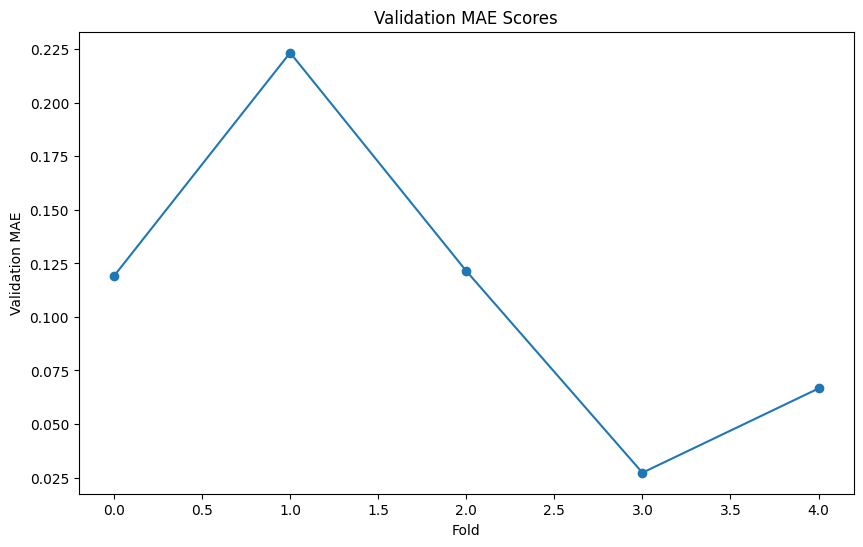

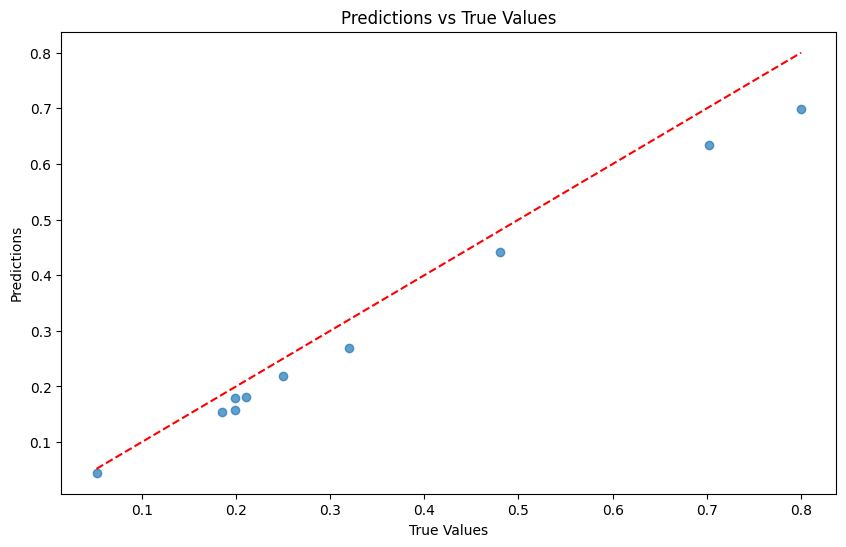

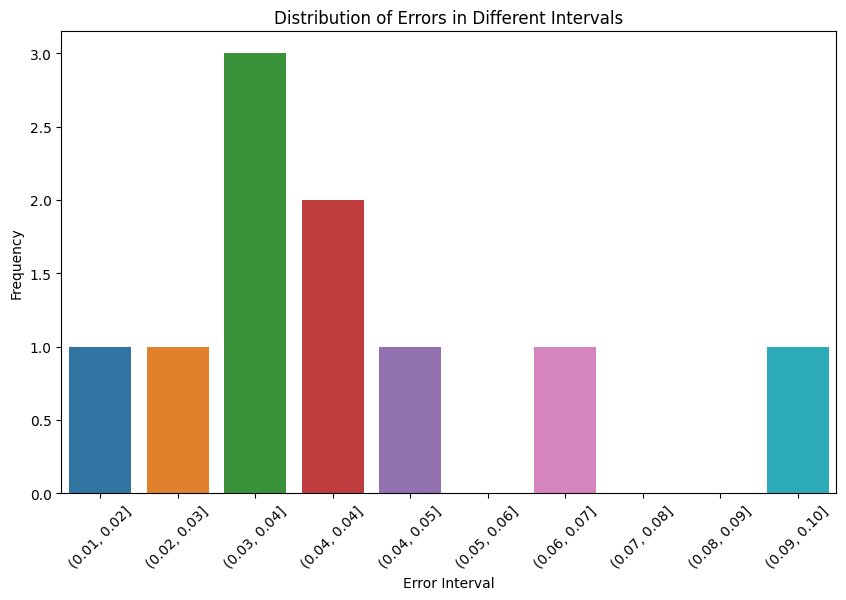

95.0% confidence interval: (0.1409214210370589, 0.45503448726143353)


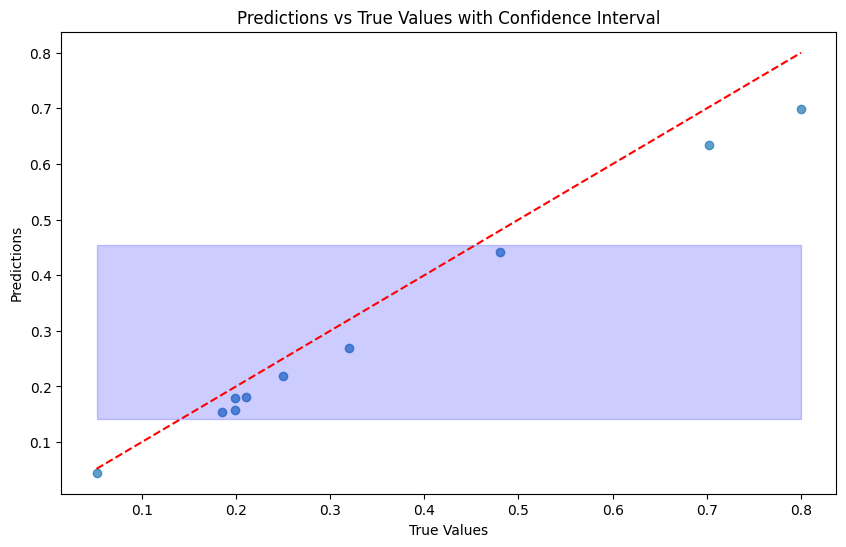

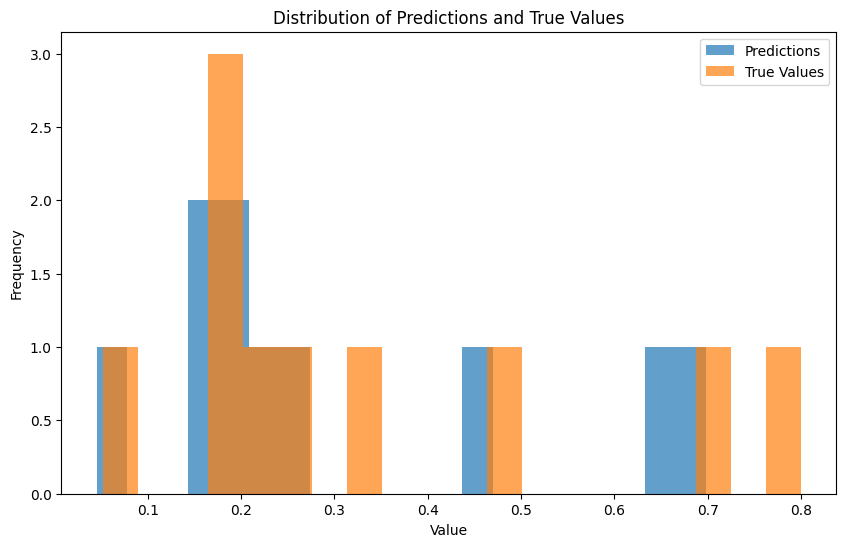

Validation Scores:
   Fold  Validation MAE
0     1        0.119095
1     2        0.223366
2     3        0.121453
3     4        0.027262
4     5        0.066597


In [14]:
try:
    # Making predictions on the test set
    X_test = train_data['problem'].tolist()[-100:]  # Using the last 100 samples as the test set
    input_ids_test = tokenize_and_prepare(X_test, tokenizer, 256)
    attention_mask_test = (input_ids_test != 0).astype(int)
    test_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": input_ids_test, "attention_mask": attention_mask_test}, y_train[-100:]))
    test_dataset = test_dataset.batch(64)
    
    y_pred = model.predict(test_dataset).flatten()
    y_test = y_train[-100:]
    
    # Calculate additional metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    
    # Print all metrics
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2}")
    print(f"Explained Variance Score: {explained_variance}")
    
    # Validation Scores Graph
    plt.figure(figsize=(10, 6))
    plt.plot(val_scores, marker='o')
    plt.xlabel('Fold')
    plt.ylabel('Validation MAE')
    plt.title('Validation MAE Scores')
    plt.show()
    
    # Predictions vs True Values Graph
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs True Values')
    plt.show()
    
    # Calculating absolute errors
    errors = np.abs(y_test - y_pred)
    
    # Defining error intervals automatically using numpy.histogram
    num_bins = 10  # Number of desired intervals
    counts, bin_edges = np.histogram(errors, bins=num_bins)
    
    # Creating labels for the intervals
    error_labels = [f"({bin_edges[i]:.2f}, {bin_edges[i+1]:.2f}]" for i in range(len(bin_edges)-1)]
    
    # Counting the frequency of errors in each interval
    error_counts = dict(zip(error_labels, counts))
    
    # Plotting the distribution of errors
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(error_counts.keys()), y=list(error_counts.values()))
    plt.xlabel('Error Interval')
    plt.ylabel('Frequency')
    plt.title('Distribution of Errors in Different Intervals')
    plt.xticks(rotation=45)
    plt.show()
    
    # Confidence Intervals
    confidence_level = 0.95
    degrees_freedom = len(y_test) - 1
    sample_mean = np.mean(y_pred)
    sample_standard_error = stats.sem(y_pred)
    
    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)
    
    print(f"{confidence_level*100}% confidence interval: {confidence_interval}")
    
    # Adding confidence intervals to the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.fill_between([min(y_test), max(y_test)], 
                     [confidence_interval[0], confidence_interval[0]], 
                     [confidence_interval[1], confidence_interval[1]], 
                     color='b', alpha=0.2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Predictions vs True Values with Confidence Interval')
    plt.show()
    
    # Distribution of Predictions
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred, bins=20, alpha=0.7, label='Predictions')
    plt.hist(y_test, bins=20, alpha=0.7, label='True Values')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predictions and True Values')
    plt.legend()
    plt.show()
    
    # Create a DataFrame with validation scores
    val_scores_df = pd.DataFrame({'Fold': range(1, len(val_scores) + 1), 'Validation MAE': val_scores})
    
    # Display the DataFrame
    print("Validation Scores:")
    print(val_scores_df)
except MemoryError:
    print("MemoryError: The test data is too large to fit in memory.")
except Exception as e:
    print(f"An error occurred: {{e}}")
